In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
print("Libraries for Omics analysis imported.")

Libraries for Omics analysis imported.


In [2]:
# 1. Simulate High-Dimensional Gene Expression Data
n_samples = 150
n_genes = 10000 # High dimensionality (Typical for transcriptomics)
true_centers = 3 # We assume 3 cancer subtypes exist in nature

# Generate data
X, y_true = make_blobs(n_samples=n_samples, n_features=n_genes,
                       centers=true_centers, cluster_std=2.0, random_state=42)

# Convert to DataFrame
gene_names = [f"Gene_{i}" for i in range(1, n_genes+1)]
df = pd.DataFrame(X, columns=gene_names)

print(f"Dataset Shape: {df.shape} (Patients x Genes)")
print("First 5 rows of expression data:")
print(df.iloc[:, :5].head()) # Show only first 5 genes

Dataset Shape: (150, 10000) (Patients x Genes)
First 5 rows of expression data:
     Gene_1     Gene_2    Gene_3    Gene_4     Gene_5
0 -3.127819   7.694999  4.856363 -0.418559  -5.953661
1 -5.863184  11.137164  4.531323  0.762832  -5.353094
2 -0.827319   8.339335  5.340950  1.405286 -10.699609
3  3.409047  -4.390981 -3.803739  5.296681   0.370590
4 -5.480293   8.425380  2.428639 -3.243476  -6.705132


In [3]:
# 1. Standardization (Crucial for PCA/K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 2. PCA (Principal Component Analysis)
# Reduce 10,000 genes to 50 "Principal Components" to remove noise
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA Variance Explained: {np.sum(pca.explained_variance_ratio_)*100:.2f}%")

# 3. t-SNE (t-Distributed Stochastic Neighbor Embedding)
# Great for visualizing high-dimensional clusters in 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_pca) # Feed PCA results into t-SNE (Standard pipeline)

print("Dimensionality reduction completed.")

PCA Variance Explained: 84.03%
Dimensionality reduction completed.


In [4]:
# Apply K-Means Clustering to find subtypes
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

# Add results to dataframe for plotting
df_vis = pd.DataFrame(data=X_tsne, columns=['Dim1', 'Dim2'])
df_vis['Cluster'] = cluster_labels

print("K-Means clustering completed. Subtypes identified.")

K-Means clustering completed. Subtypes identified.


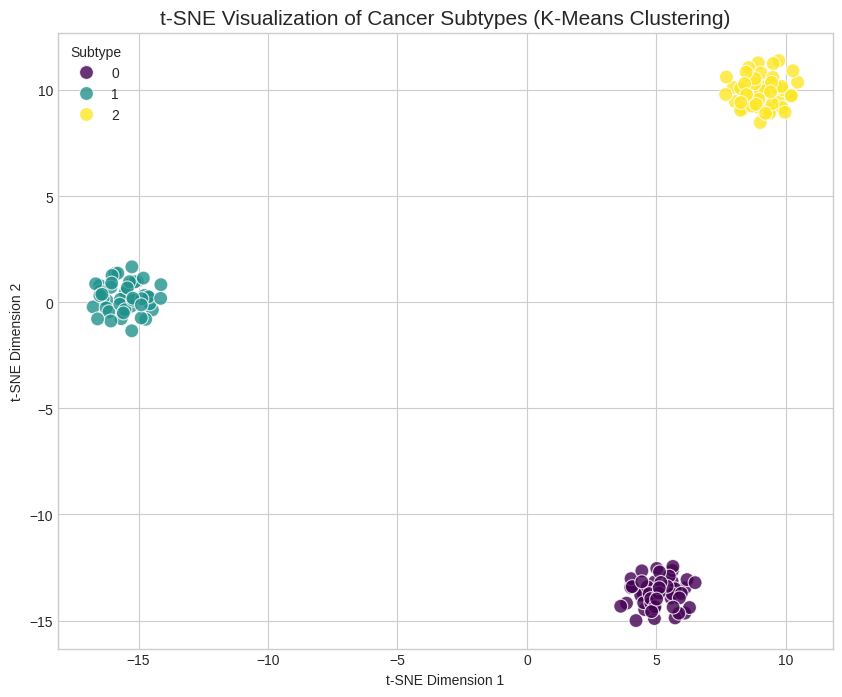

In [5]:
# Plot the t-SNE results colored by K-Means Cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Dim1', y='Dim2',
    hue='Cluster',
    palette='viridis',
    data=df_vis,
    s=100,
    alpha=0.8
)

plt.title('t-SNE Visualization of Cancer Subtypes (K-Means Clustering)', fontsize=15)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Subtype')
plt.show()